In [16]:
import io

import geomagio
from obspy.core import UTCDateTime

import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
input_factory = geomagio.edge.EdgeFactory()
timeseries = input_factory.get_timeseries(
    observatory = 'HAD',
    channels = ('H', 'E', 'Z', 'F'),
    type = 'variation',
    interval = 'minute',
        starttime = UTCDateTime('2016-03-20T00:00:00Z'),
        endtime = UTCDateTime('2016-03-23T00:00:00Z'))

# The output factory expects a string, but we do not want to save to a file.
# Therefore, stream the data into a string buffer.
HAD_buf = io.StringIO("")

output_factory = geomagio.imfjson.IMFJSONWriter()
output_factory.write(
    channels = ('H', 'E', 'Z', 'F'),
    out = HAD_buf,
    timeseries = timeseries)

read_wave_server_v returned flag FL - requested data left (earlier) than tank contents


In [21]:
HAD_str = HAD_buf.getvalue()
HAD_dict = json.loads(HAD_str[2:-1])
HAD_magdat = pd.DataFrame({"times": HAD_dict["times"],
                    "H": HAD_dict["values"][0]["values"],
                    "E": HAD_dict["values"][1]["values"],
                    "Z": HAD_dict["values"][2]["values"]})
HAD_magdat["times"] = pd.to_datetime(HAD_magdat["times"])
HAD_magdat.set_index("times", drop=True, inplace=True)
HAD_magdat.tail()

,H,E,Z
times,,,
2016-03-22 23:56:00,19758.9,-749.0,44349.1
2016-03-22 23:57:00,19759.0,-749.0,44349.2
2016-03-22 23:58:00,19759.0,-749.0,44349.2
2016-03-22 23:59:00,19758.9,-749.4,44349.2
2016-03-23 00:00:00,19758.9,-749.4,44349.3


In [22]:
HAD_magdat["F"] = np.linalg.norm(HAD_magdat.loc[:, ["H", "E", "Z"]], axis=1)

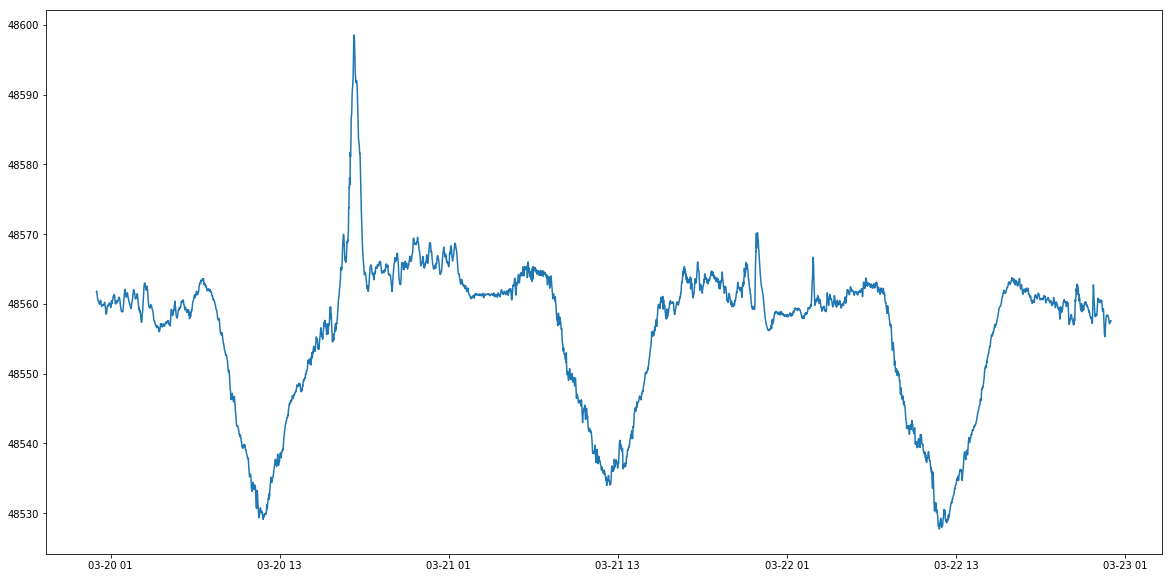

In [23]:
plt.figure(figsize=(20,10))
plt.plot(HAD_magdat["F"])